In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [35]:
ħ = 1.0
m = 1.0
L = 20.0
Nx = 1000
x = np.linspace(-L, L, Nx)
dx = x[1] - x[0]
N_states = 1000

V0 = -5.0
σ_v = 1.0
x0_v = 0.0
V = V0 * np.exp(-(x - x0_v)**2 / (2 * σ_v**2))

In [37]:
x0 = -8.0
σ_w = 1.0
k0 = 2.0
psi0 = np.exp(-(x - x0)**2 / (2 * σ_w**2)) * np.exp(1j * k0 * x)
psi0 /= np.sqrt(np.trapz(np.abs(psi0)**2, x))  

kinetic_main = np.full(Nx, 1.0 / dx**2)
kinetic_off = np.full(Nx - 1, -0.5 / dx**2)
H_diag = ħ**2 / (2 * m) * kinetic_main + V
H_off = ħ**2 / (2 * m) * kinetic_off

In [71]:
E, phi = eigh_tridiagonal(H_diag, H_off, select='i', select_range=(0, N_states - 1))  

cs = np.dot(phi.T.conj(), psi0) * dx

dt = 0.01
t_points = [0, 10, 20, 40, 60, 80, 100]
psi_list = []

In [72]:
for t in t_points:
    phase = np.exp(-1j * E * t * dt / ħ)  
    psi_t = np.dot(cs * phase, phi.T)
    psi_list.append(np.abs(psi_t)**2)

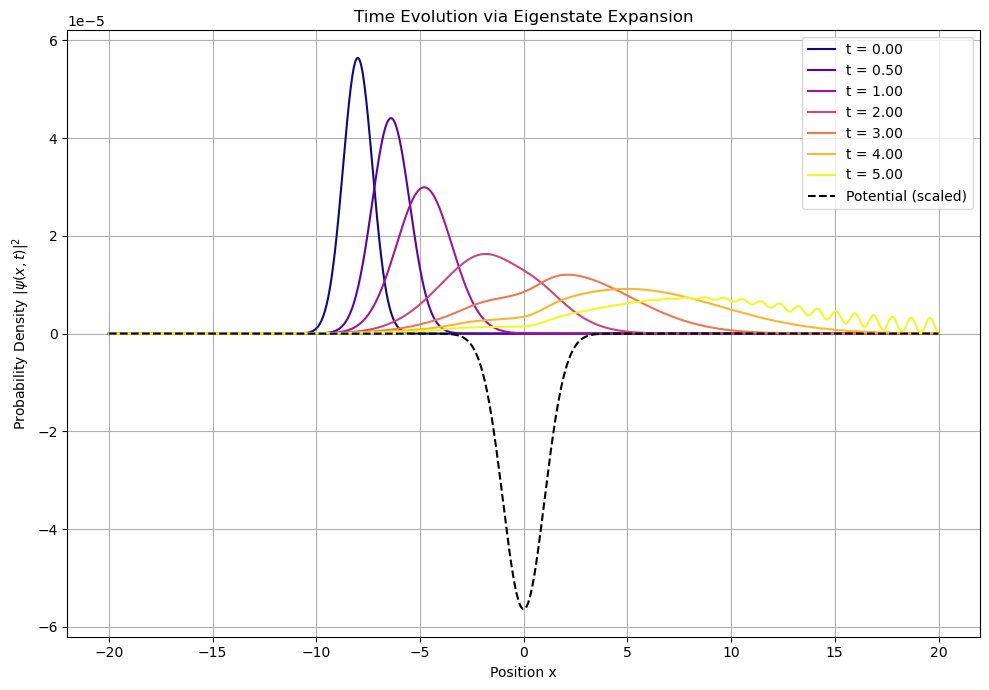

In [73]:
plt.figure(figsize=(10, 7))
colors = plt.cm.plasma(np.linspace(0, 1, len(t_points)))

for i, density in enumerate(psi_list):
    plt.plot(x, density, color=colors[i], label=f"t = {5*t_points[i]*dt:.2f}")

scaled_V = V / abs(V0) * max(np.max(p) for p in psi_list)
plt.plot(x, scaled_V, 'k--', label="Potential (scaled)")

plt.xlabel("Position x")
plt.ylabel(r"Probability Density $|\psi(x, t)|^2$")
plt.title("Time Evolution via Eigenstate Expansion")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()